## Interactive Model Testing

In [1]:
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from ipywidgets import (
    FloatSlider, 
    IntSlider,
    interact, 
    interactive, 
    fixed, 
    interact_manual
)

from fdrc.artificial_data import make_gaussian_hypotheses, make_ar_hypotheses
from fdrc.plots import plot_dataset, plot_result
from fdrc.filters import build_filter


# Interactive Filter Runner:
def run_interactive_filter(filter_name, **kwargs):
    est_labels, state = build_filter(filter_name, kwargs).step(dataset["p_values"])
    return plot_result(dataset, thresholds=state.threshold_history)

## Generate Artificial Data

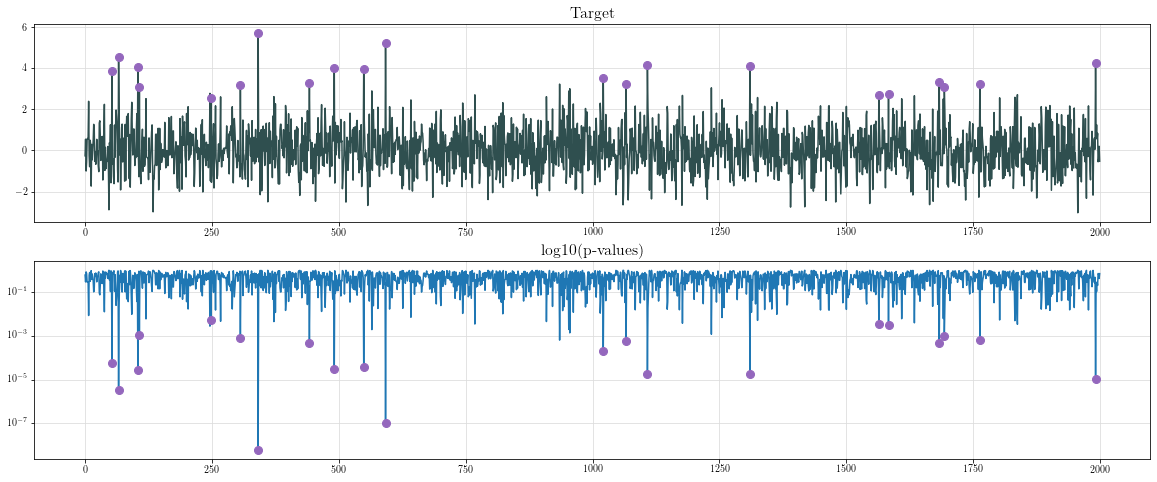

In [2]:
DATA_SIZE = 2000

dataset = make_gaussian_hypotheses(
    size=DATA_SIZE,
    anomaly_ratio=0.01,
    signal_strength=3.0,
    data_noise=1.0,
    #signal_strength=list(np.linspace(3.0, 5.0, DATA_SIZE)),
    #data_noise=list(np.linspace(1.0, 2.0, DATA_SIZE))
)

plot_dataset(dataset)

## Test Fixed Threshold Filter

In [3]:
interact(
    run_interactive_filter,
    filter_name=fixed("FixedThresholdFilter"),
    threshold=FloatSlider(min=0.001, max=0.01, step=0.001, value=0.005, readout_format='.3f')
);

interactive(children=(FloatSlider(value=0.005, description='threshold', max=0.01, min=0.001, readout_format='.…

## LORD Filter

In [4]:
interact(
    run_interactive_filter,
    filter_name=fixed("LORDFilter"),
    fdr_target=FloatSlider(min=0.01, max=1, step=0.01, value=0.05), 
    gamma_size=IntSlider(min=0, max=DATA_SIZE, step=1, value=200), 
    delta=FloatSlider(min=0.9, max=1, step=0.01, value=0.99),
    epsilon_w=FloatSlider(min=0, max=0.01, step=0.001, value=0.0),
    epsilon_r=FloatSlider(min=0, max=1, step=0.1, value=0.0),
);

interactive(children=(FloatSlider(value=0.05, description='fdr_target', max=1.0, min=0.01, step=0.01), IntSlid…

## Test Decay LORD Filter

In [5]:
interact(
    run_interactive_filter,
    filter_name=fixed("DecayLORDFilter"),
    fdr_target=FloatSlider(min=0.01, max=1, step=0.01, value=0.05), 
    gamma_size=IntSlider(min=0, max=DATA_SIZE, step=1, value=200), 
    delta=FloatSlider(min=0.9, max=1, step=0.01, value=0.99), 
    eta=FloatSlider(min=0.1, max=5, step=0.1, value=1.0),
);

interactive(children=(FloatSlider(value=0.05, description='fdr_target', max=1.0, min=0.01, step=0.01), IntSlid…

## Test SAFFRON Filter

In [6]:
interact(
    run_interactive_filter,
    filter_name=fixed("SAFFRONFilter"),
    fdr_target=FloatSlider(min=0.01, max=1, step=0.01, value=0.05), 
    candidacy_threshold=FloatSlider(description="candidate_t", min=0.1, max=0.9, step=0.1, value=0.5),     
    gamma_exponent=FloatSlider(description="gamma_exp", min=1.1, max=2.0, step=0.1, value=1.6), 
    gamma_size=IntSlider(min=0, max=DATA_SIZE, step=1, value=200),
);

interactive(children=(FloatSlider(value=0.05, description='fdr_target', max=1.0, min=0.01, step=0.01), FloatSl…

## Test Decay SAFFRON Filter

In [7]:
interact(
    run_interactive_filter,
    filter_name=fixed("DecaySAFFRONFilter"),
    fdr_target=FloatSlider(min=0.01, max=1, step=0.01, value=0.05), 
    candidacy_threshold=FloatSlider(description="candidate_t", min=0.1, max=0.9, step=0.1, value=0.5),     
    gamma_exponent=FloatSlider(description="gamma_exp", min=1.1, max=2.0, step=0.1, value=1.6), 
    gamma_size=IntSlider(min=0, max=DATA_SIZE, step=1, value=200),
    delta=FloatSlider(min=0.9, max=1, step=0.01, value=0.99), 
    eta=FloatSlider(min=0.1, max=5, step=0.1, value=1.0),
);

interactive(children=(FloatSlider(value=0.05, description='fdr_target', max=1.0, min=0.01, step=0.01), FloatSl…

## Test ADDIS Filter

In [8]:
interact(
    run_interactive_filter,
    filter_name=fixed("ADDISFilter"),
    fdr_target=FloatSlider(min=0, max=0.1, step=0.01, value=0.05), 
    candidacy_threshold=FloatSlider(description="candidate_t", min=0.1, max=0.9, step=0.1, value=0.25),
    discarding_threshold=FloatSlider(description="discard_t", min=0.1, max=0.9, step=0.1, value=0.5),
    gamma_exponent=FloatSlider(description="gamma_exp", min=1.1, max=2.0, step=0.1, value=1.6), 
    gamma_size=IntSlider(min=0, max=DATA_SIZE, step=1, value=200),
    delta=FloatSlider(min=0.9, max=1, step=0.01, value=0.99), 
    eta=FloatSlider(min=0.1, max=5, step=0.1, value=1.0),
);

interactive(children=(FloatSlider(value=0.05, description='fdr_target', max=0.1, step=0.01), FloatSlider(value…